In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df_test=pd.read_csv('/content/test_data.txt',sep=":::",header=0,engine='python')
df_train=pd.read_csv('/content/train_data.txt',sep=":::",header=0,engine='python')


In [3]:
df_train.columns=['index','title','genre','plot']
df_test.columns=['index','title','genre']

In [4]:
df_test.head(6)

,index,title,genre
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
5,7,L'amica (1969),The beautiful but neglected wife of a brillia...


In [5]:
df_train.head(6)

,index,title,genre,plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53906 entries, 0 to 53905
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   53906 non-null  int64 
 1   title   53906 non-null  object
 2   genre   53906 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54213 non-null  int64 
 1   title   54213 non-null  object
 2   genre   54213 non-null  object
 3   plot    54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
df_train.describe()

,index
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [9]:
df_test.describe()

,index
count,53906.000000
mean,26954.500000
std,15561.466142
min,2.000000
25%,13478.250000
50%,26954.500000
75%,40430.750000
max,53907.000000


In [10]:
df_test.isnull().sum()

,0
index,0
title,0
genre,0


In [11]:
df_train.isnull().sum()

,0
index,0
title,0
genre,0
plot,0


In [12]:
df_train.count()

,0
index,54213
title,54213
genre,54213
plot,54213


In [13]:
df_test.count()

,0
index,53906
title,53906
genre,53906


In [14]:
df_train.iloc[0:3]

,index,title,genre,plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [15]:
df_train.iloc[0]

,0
index,2
title,Cupid (1997)
genre,thriller
plot,A brother and sister with a past incestuous r...


In [16]:
df_test.shape

(53906, 3)

In [17]:
df_train.shape

(54213, 4)

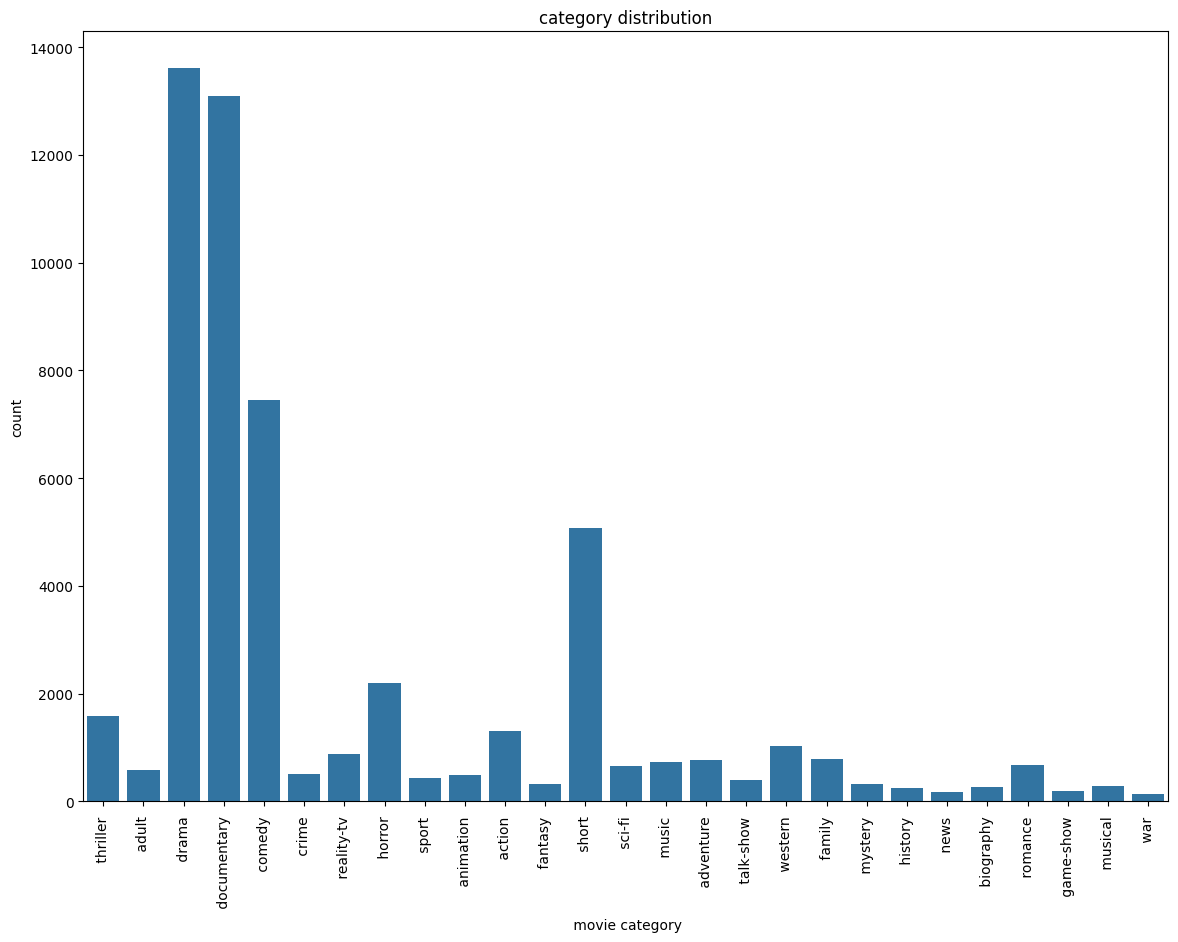

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(x='genre', data = df_train)
plt.xlabel(' movie category')
plt.ylabel('count')
plt.title('category distribution')
plt.xticks(rotation=90);
plt.show()

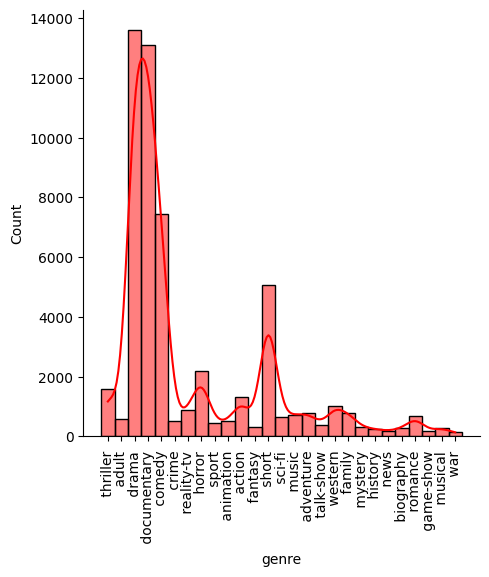

In [19]:
sns.displot(df_train['genre'],kde=True,color='red')
plt.xticks(rotation=90);


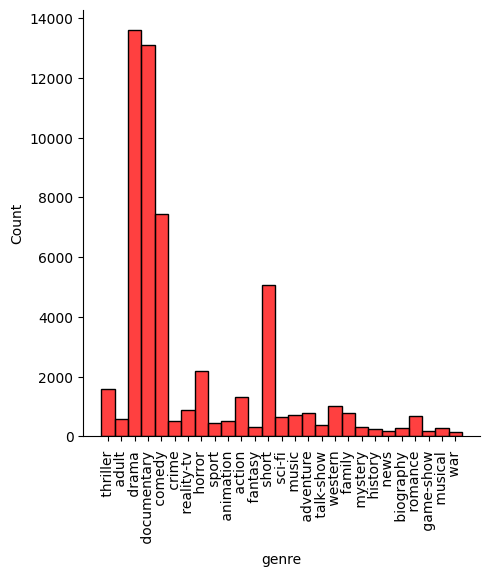

In [20]:
sns.displot(df_train['genre'],kde=False,color='red')
plt.xticks(rotation=90);

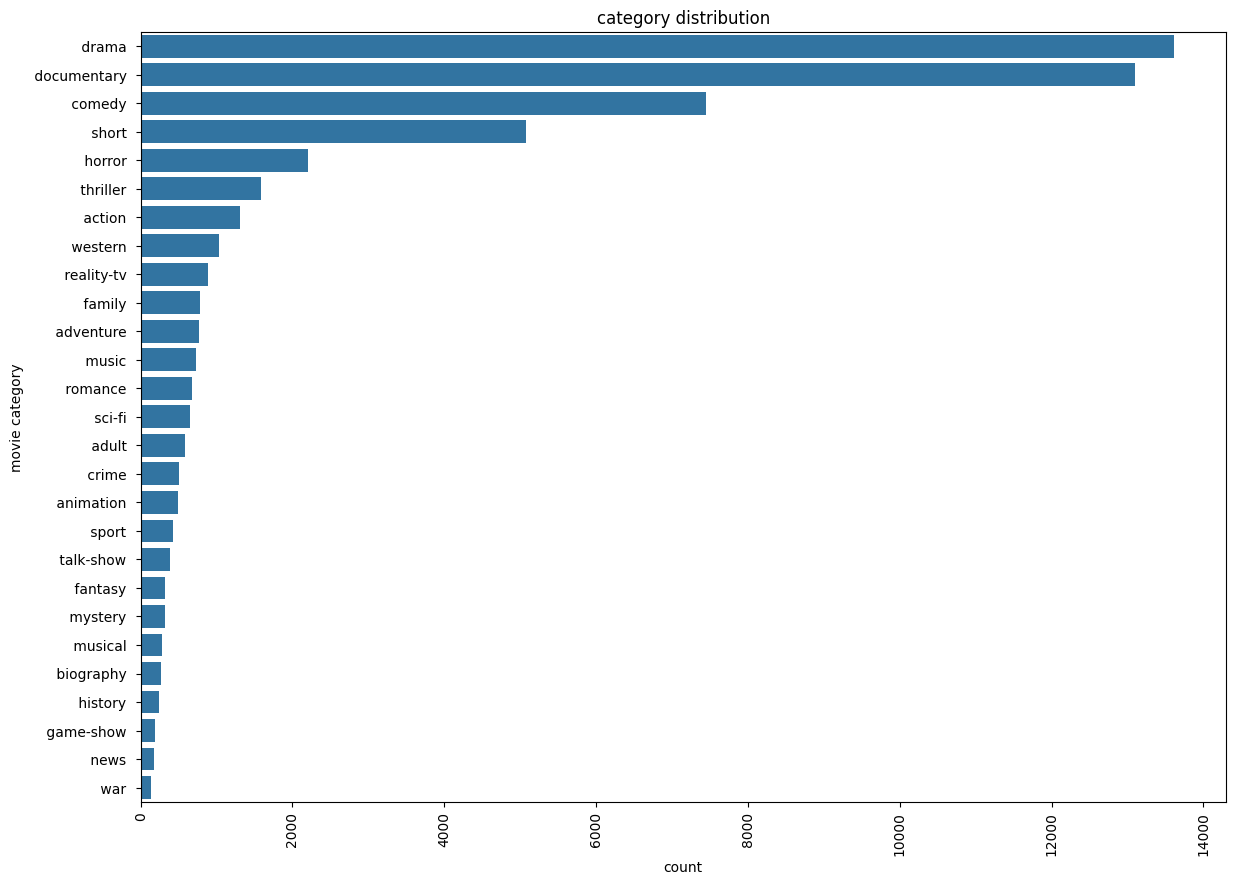

In [21]:
plt.figure(figsize=(14,10))
count1=df_train['genre'].value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count')
plt.ylabel('movie category')
plt.title('category distribution')
plt.xticks( rotation=90);
plt.show()

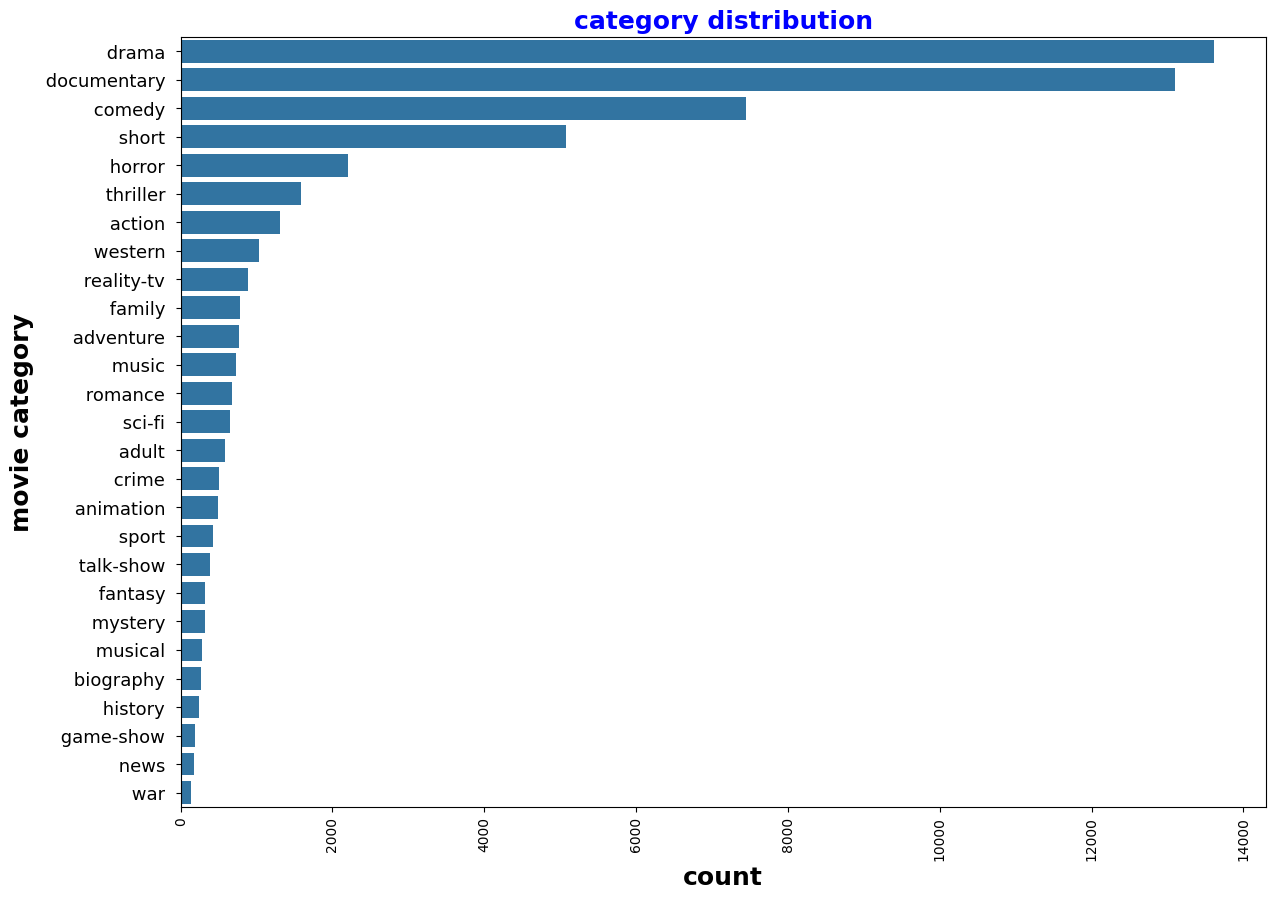

In [22]:
plt.figure(figsize=(14,10))
count1=df_train.genre.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count',fontsize=18,fontweight='bold')
plt.ylabel('movie category',fontsize=18,fontweight='bold')
plt.title('category distribution',fontsize=18,fontweight='bold',color='blue')
plt.xticks( rotation=90);
plt.yticks(fontsize=13)
plt.show()

In [23]:
df_combined=pd.concat([df_train,df_test])

In [24]:
df_combined.head()

,index,title,genre,plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [25]:
df_combined.shape

(108119, 4)

In [26]:
df_combined.size

432476

In [27]:
df_combined.isnull().any()

,0
index,False
title,False
genre,False
plot,True


In [28]:
df_combined.count()

,0
index,108119
title,108119
genre,108119
plot,54213


In [29]:
encoder=LabelEncoder()
df_combined['genre']=encoder.fit_transform(df_combined['genre'])

In [30]:
encoder=LabelEncoder()
df_combined['title']=encoder.fit_transform(df_combined['title'])

In [31]:
df_combined.head()

,index,title,genre,plot
0,2,31125,53781,A brother and sister with a past incestuous r...
1,3,107215,53690,As the bus empties the students for their fie...
2,4,95853,53709,To help their unemployed father make ends mee...
3,5,97288,53709,The film's title refers not only to the un-re...
4,6,74299,53707,Quality Control consists of a series of 16mm ...


In [32]:
df_combined.genre=df_combined.genre.fillna(df_combined.genre.mean())

In [33]:
df_combined.count()

,0
index,108119
title,108119
genre,108119
plot,54213


In [34]:
df_combined.duplicated().values.any()

False

In [35]:
vectorizer=TfidfVectorizer()

In [36]:
df_combined.head()

,index,title,genre,plot
0,2,31125,53781,A brother and sister with a past incestuous r...
1,3,107215,53690,As the bus empties the students for their fie...
2,4,95853,53709,To help their unemployed father make ends mee...
3,5,97288,53709,The film's title refers not only to the un-re...
4,6,74299,53707,Quality Control consists of a series of 16mm ...


In [37]:
y=df_combined["genre"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df_combined,y,test_size=0.2,random_state=42)

In [41]:
naive_bayes_model=MultinomialNB()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample data (replace this with your actual data loading)
data = {'title': ['Sample title 1', 'Another title 2'], 'genre': ['Genre A', 'Genre B']}
df_combined = pd.DataFrame(data)

# Assuming 'title' column contains text data, but check to make sure
# there are no integers in the column
df_combined['title'] = df_combined['title'].astype(str)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined["title"])

# 'genre' is your target variable
y = df_combined["genre"]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

# Fit the model with the training data (features and labels)
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [3]:
nb_predictions=naive_bayes_model.predict(x_test)

In [7]:
print("NAIVE BAYES MODEL:")
print(confusion_matrix(y_test,nb_predictions))
print(accuracy_score(y_test,nb_predictions))
print("Accuracy:",accuracy_score(y_test,nb_predictions))
print("R2_Score:",r2_score(y_test, nb_predictions))

NAIVE BAYES MODEL:
[[0 0]
 [1 0]]
0.0
Accuracy: 0.0


ValueError: could not convert string to float: 'Genre B'

In [8]:
print("NAIVE BAYES MODEL:")
print(confusion_matrix(y_test,nb_predictions))
print(accuracy_score(y_test,nb_predictions))
print("Accuracy:",accuracy_score(y_test,nb_predictions))

# Use metrics appropriate for classification tasks, such as accuracy, precision, recall, F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_predictions))

NAIVE BAYES MODEL:
[[0 0]
 [1 0]]
0.0
Accuracy: 0.0
              precision    recall  f1-score   support

     Genre A       0.00      0.00      0.00       0.0
     Genre B       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# Import the confusion_matrix, classification_report, accuracy_score and r2_score functions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score

# Sample data (replace this with your actual data loading)
data = {'title': ['Sample title 1', 'Another title 2'], 'genre': ['Genre A', 'Genre B']}
df_combined = pd

In [10]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression

logistics_regression_model=LogisticRegression()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


# Sample data with multiple genres
data = {'title': ['Sample title 1', 'Another title 2', 'Title 3', 'Title 4'],
        'genre': ['Genre A', 'Genre B', 'Genre A', 'Genre B']}
df = pd.DataFrame(data)

# Split data into training and testing sets
X = df['title']
y = df['genre']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Train the Logistic Regression model
logistics_regression_model = LogisticRegression()
logistics_regression_model.fit(x_train, y_train)

# Make predictions
predictions = logistics_regression_model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

[[0 1]
 [0 0]]
0.0
              precision    recall  f1-score   support

     Genre A       0.00      0.00      0.00       1.0
     Genre B       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.